**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2023*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

from sqlalchemy import create_engine, text

In [2]:
import plotly
plotly.__version__


'5.13.1'

In [3]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')


In [4]:
melb_df[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## Ejercicio 2 - Pandas: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

 
2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

**RESPUESTAS**



Ejercicio 1) <br>
1.   Crear una base de datos en SQLite utilizando la libreria SQLalchemy. https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite


In [5]:
engine = create_engine('sqlite:///grupo26.sqlite3', echo=True)
# ubic del archivo sqlite3 en '/content'

2.   Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.



*Usamos el dataframe original presentado en clases ya que la ultima version del dataframe no contenia los datos necesarios para realizar las consignas.*

In [6]:
# melb_df es el dataframe del servidor UNC
# airbnb_df es el dataframe generado en clases

interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols,
    dtype='unicode')

airbnb_df[:5]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.77268393,145.0921328,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.76650512,144.9807361,35,200,803
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.85975502,144.9773691,159,1253,4452
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.75897072,144.9892279,50,250,920
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.8645303,144.9922379,69,400,1900


In [7]:
# Datos de df unc a tabla
melb_df.to_sql('melb_table', con=engine, if_exists="replace")

2023-06-08 23:07:48,118 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:48,128 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_table")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("melb_table")


2023-06-08 23:07:48,133 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 23:07:48,137 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb_table")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("melb_table")


2023-06-08 23:07:48,140 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 23:07:48,143 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 23:07:48,151 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:48,156 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb_table (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE melb_table (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2023-06-08 23:07:48,158 INFO sqlalchemy.engine.Engine [no key 0.00182s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00182s] ()


2023-06-08 23:07:48,175 INFO sqlalchemy.engine.Engine CREATE INDEX ix_melb_table_index ON melb_table ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_melb_table_index ON melb_table ("index")


2023-06-08 23:07:48,179 INFO sqlalchemy.engine.Engine [no key 0.00337s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00337s] ()


2023-06-08 23:07:48,196 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 23:07:48,307 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:48,899 INFO sqlalchemy.engine.Engine INSERT INTO melb_table ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO melb_table ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-06-08 23:07:48,909 INFO sqlalchemy.engine.Engine [generated in 0.49683s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.49683s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2023-06-08 23:07:49,187 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


13580

In [8]:
# datos df generado en clase a tabla
airbnb_df.to_sql('airbnb_table', con=engine, if_exists="replace")

2023-06-08 23:07:49,246 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:49,251 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_table")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb_table")


2023-06-08 23:07:49,256 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 23:07:49,263 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_table")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("airbnb_table")


2023-06-08 23:07:49,269 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 23:07:49,274 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 23:07:49,282 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:49,298 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_table (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude TEXT, 
	longitude TEXT, 
	price TEXT, 
	weekly_price TEXT, 
	monthly_price TEXT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE airbnb_table (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude TEXT, 
	longitude TEXT, 
	price TEXT, 
	weekly_price TEXT, 
	monthly_price TEXT
)




2023-06-08 23:07:49,301 INFO sqlalchemy.engine.Engine [no key 0.00246s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00246s] ()


2023-06-08 23:07:49,332 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_table_index ON airbnb_table ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_airbnb_table_index ON airbnb_table ("index")


2023-06-08 23:07:49,338 INFO sqlalchemy.engine.Engine [no key 0.00563s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00563s] ()


2023-06-08 23:07:49,362 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 23:07:49,430 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:50,246 INFO sqlalchemy.engine.Engine INSERT INTO airbnb_table ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO airbnb_table ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-06-08 23:07:50,253 INFO sqlalchemy.engine.Engine [generated in 0.71098s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', '-37.77268393', '145.0921328', '60', None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultura

INFO:sqlalchemy.engine.Engine:[generated in 0.71098s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', '-37.77268393', '145.0921328', '60', None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural strips of inner Northe

2023-06-08 23:07:50,925 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


22895



3.   Implementar consultas en SQL que respondan con la siguiente información:


*   **cantidad de registros totales por ciudad.**




In [9]:
# aca tomamos la tabla con datos de airbnb
query = """ SELECT city as ciudad, COUNT(city) as registros FROM airbnb_table GROUP BY city """
with engine.connect() as con:
    rs = con.execute(text(query))
    df_rs = pd.DataFrame(rs.fetchall())

df_rs

2023-06-08 23:07:51,073 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:51,081 INFO sqlalchemy.engine.Engine  SELECT city as ciudad, COUNT(city) as registros FROM airbnb_table GROUP BY city 


INFO:sqlalchemy.engine.Engine: SELECT city as ciudad, COUNT(city) as registros FROM airbnb_table GROUP BY city 


2023-06-08 23:07:51,102 INFO sqlalchemy.engine.Engine [generated in 0.02861s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.02861s] ()


2023-06-08 23:07:51,193 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,ciudad,registros
0,Banyule,203
1,Bayside,375
2,Boroondara,664
3,Brimbank,108
4,Cardinia,123
5,Casey,153
6,Darebin,698
7,Frankston,177
8,Glen Eira,631
9,Greater Dandenong,147


Consideramos usar el atributo **CouncilArea** como representacion de ciudad ya que nos parecia el mas representativo para ciudad. Ademas, comparando la cantidad de filas generadas al agrupar por ciudad, tenemos 30 ciudades y 32 por CouncilaArea por lo que no difieren mucho en la agrupacion. 

In [10]:
 # Aca la tabla con los datos de melbourne
query = """ SELECT CouncilArea, COUNT(CouncilArea) FROM melb_table GROUP BY CouncilArea """
with engine.connect() as con:
    rows = con.execute(text(query))
    df_rows = pd.DataFrame(rows.fetchall())
df_rows

2023-06-08 23:07:51,238 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:51,247 INFO sqlalchemy.engine.Engine  SELECT CouncilArea, COUNT(CouncilArea) FROM melb_table GROUP BY CouncilArea 


INFO:sqlalchemy.engine.Engine: SELECT CouncilArea, COUNT(CouncilArea) FROM melb_table GROUP BY CouncilArea 


2023-06-08 23:07:51,250 INFO sqlalchemy.engine.Engine [generated in 0.01243s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01243s] ()


2023-06-08 23:07:51,287 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,CouncilArea,COUNT(CouncilArea)
0,None,0
1,Banyule,594
2,Bayside,489
3,Boroondara,1160
4,Brimbank,424
5,Cardinia,8
6,Casey,38
7,Darebin,934
8,Frankston,53
9,Glen Eira,848




---


*   cantidad de registros totales por barrio y ciudad
<br>


In [11]:
# df melbourne
query = """ SELECT CouncilArea, Suburb, COUNT(Suburb) FROM melb_table GROUP BY CouncilArea, Suburb """
with engine.connect() as con:
    rs = con.execute(text(query))
    df_rs = pd.DataFrame(rs.fetchall())

df_rs

2023-06-08 23:07:51,345 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:51,360 INFO sqlalchemy.engine.Engine  SELECT CouncilArea, Suburb, COUNT(Suburb) FROM melb_table GROUP BY CouncilArea, Suburb 


INFO:sqlalchemy.engine.Engine: SELECT CouncilArea, Suburb, COUNT(Suburb) FROM melb_table GROUP BY CouncilArea, Suburb 


2023-06-08 23:07:51,377 INFO sqlalchemy.engine.Engine [generated in 0.03227s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.03227s] ()


2023-06-08 23:07:51,472 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,CouncilArea,Suburb,COUNT(Suburb)
0,None,Abbotsford,1
1,None,Aberfeldie,4
2,None,Airport West,6
3,None,Albanvale,2
4,None,Albert Park,5
...,...,...,...
596,Yarra Ranges,Mooroolbark,9
597,Yarra Ranges,Mount Evelyn,1
598,Yarra Ranges,Silvan,2
599,Yarra Ranges,Upwey,1


In [12]:
# df airbnb
query = """ SELECT city, suburb, COUNT(suburb) AS registros FROM airbnb_table GROUP BY city, suburb """
with engine.connect() as con:
    rs = con.execute(text(query))
    df_rs = pd.DataFrame(rs.fetchall())

df_rs

2023-06-08 23:07:51,534 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:51,543 INFO sqlalchemy.engine.Engine  SELECT city, suburb, COUNT(suburb) AS registros FROM airbnb_table GROUP BY city, suburb 


INFO:sqlalchemy.engine.Engine: SELECT city, suburb, COUNT(suburb) AS registros FROM airbnb_table GROUP BY city, suburb 


2023-06-08 23:07:51,550 INFO sqlalchemy.engine.Engine [generated in 0.02323s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.02323s] ()


2023-06-08 23:07:51,673 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,city,suburb,registros
0,Banyule,Bellfield,2
1,Banyule,Briar Hill,1
2,Banyule,Bundoora,23
3,Banyule,Eaglemont,5
4,Banyule,Greensborough,8
...,...,...,...
687,Yarra Ranges,Yarra Ranges Shire,1
688,Yarra Ranges,"Yarra Valley, Yarra Glen, Healesville",1
689,Yarra Ranges,Yellingbo,3
690,Yarra Ranges,"Yellingbo, Yarra Valley",1




4.   Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.



In [13]:
query = """SELECT melb_table.CouncilArea, melb_table.Lattitude, melb_table.Longtitude, melb_table.Regionname, melb_table.Propertycount, 
airbnb_table.zipcode, airbnb_table.price_mean, airbnb_table.count, airbnb_table.weekly_mean, airbnb_table.monthly_mean, airbnb_table.zip
FROM melb_table
LEFT JOIN (SELECT zipcode, AVG(price) AS price_mean, COUNT(price) AS count, AVG(weekly_price) AS weekly_mean, 
AVG(monthly_price) AS monthly_mean, cast(zipcode as int) AS zip 
FROM airbnb_table 
WHERE zip IS NOT NULL 
GROUP BY zip) AS airbnb_table 
ON melb_table.Postcode = airbnb_table.zip
;"""

with engine.connect() as con:
    rs = con.execute(text(query))
    df_rs_2 = pd.DataFrame(rs.fetchall())

df_rs_2[:5]

2023-06-08 23:07:51,724 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 23:07:51,735 INFO sqlalchemy.engine.Engine SELECT melb_table.CouncilArea, melb_table.Lattitude, melb_table.Longtitude, melb_table.Regionname, melb_table.Propertycount, 
airbnb_table.zipcode, airbnb_table.price_mean, airbnb_table.count, airbnb_table.weekly_mean, airbnb_table.monthly_mean, airbnb_table.zip
FROM melb_table
LEFT JOIN (SELECT zipcode, AVG(price) AS price_mean, COUNT(price) AS count, AVG(weekly_price) AS weekly_mean, 
AVG(monthly_price) AS monthly_mean, cast(zipcode as int) AS zip 
FROM airbnb_table 
WHERE zip IS NOT NULL 
GROUP BY zip) AS airbnb_table 
ON melb_table.Postcode = airbnb_table.zip
;


INFO:sqlalchemy.engine.Engine:SELECT melb_table.CouncilArea, melb_table.Lattitude, melb_table.Longtitude, melb_table.Regionname, melb_table.Propertycount, 
airbnb_table.zipcode, airbnb_table.price_mean, airbnb_table.count, airbnb_table.weekly_mean, airbnb_table.monthly_mean, airbnb_table.zip
FROM melb_table
LEFT JOIN (SELECT zipcode, AVG(price) AS price_mean, COUNT(price) AS count, AVG(weekly_price) AS weekly_mean, 
AVG(monthly_price) AS monthly_mean, cast(zipcode as int) AS zip 
FROM airbnb_table 
WHERE zip IS NOT NULL 
GROUP BY zip) AS airbnb_table 
ON melb_table.Postcode = airbnb_table.zip
;


2023-06-08 23:07:51,743 INFO sqlalchemy.engine.Engine [generated in 0.01856s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01856s] ()


2023-06-08 23:07:52,080 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,price_mean,count,weekly_mean,monthly_mean,zip
0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3067,130.624031,258.0,605.152174,2187.032258,3067.0
1,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,3067,130.624031,258.0,605.152174,2187.032258,3067.0
2,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,3067,130.624031,258.0,605.152174,2187.032258,3067.0
3,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3067,130.624031,258.0,605.152174,2187.032258,3067.0
4,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,3067,130.624031,258.0,605.152174,2187.032258,3067.0


De esta forma se recreó el dataset obtenido en el notebook de la clase (03 Combinación de datasets.ipynb)

Ejercicio 2) <br>
1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [14]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Debemos conocer la descripción de cada variable antes de decidir que variables seleccionar y cuales eliminar.

- Suburb: Suburb
- Address: Address
- Rooms: Number of rooms
- Price: Price in Australian dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; dev site - development site; res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from City Business District (CBD) in Kilometres
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size in Metres
- BuildingArea: Building Size in Metres
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude: Self explanitory
- Longtitude: Self explanitory

In [15]:
interesting_cols = ['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

melb_df2 = melb_df[interesting_cols]

Se decidió seleccionar todas las variables que brindan información descriptiva sobre la propiedad: tipo de propiedad, número de ambientes, habitaciones y baños, tamaño del edificio y del terreno, así también como el año en que fue construida. Respecto a la información geográfica incluimos nombre del suburbio, latitud y longitud, así como la distancia al CBD de Melbourne.

Eliminamos información sobre el vendedor, fecha de compra y método con el que fue adquirida la propiedad. Consideramos que no es infirmación determinante en el valor del inmueble. 

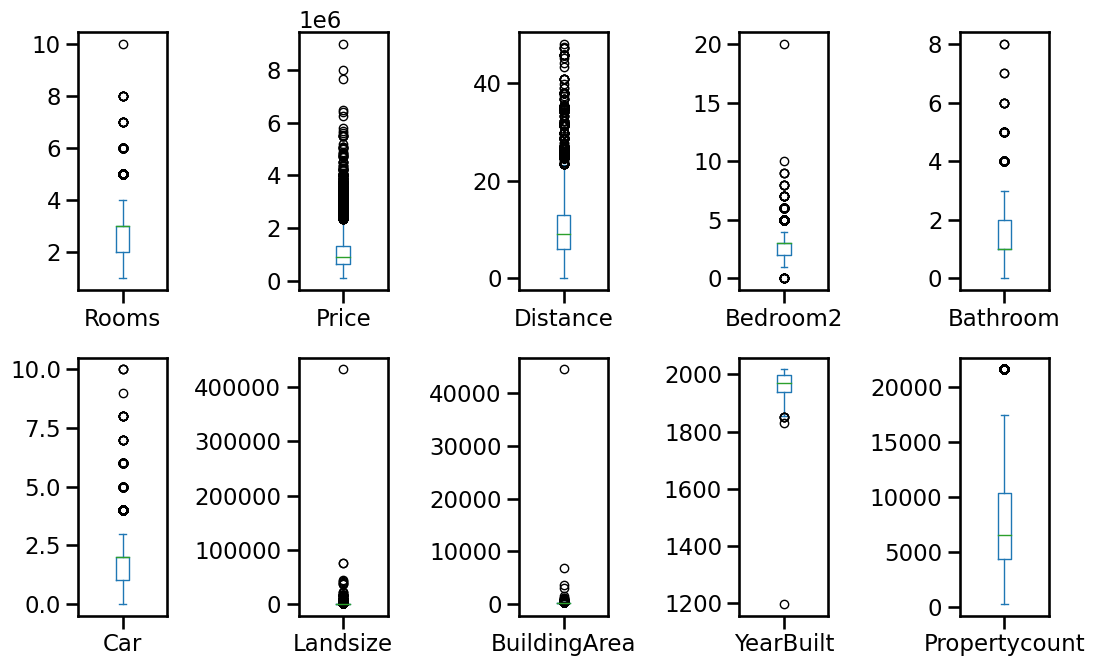

In [16]:
cols_plot = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

melb_df2[cols_plot].plot(kind="box", subplots=True, figsize=(11,7), layout = (2,5))
plt.tight_layout()
plt.show()

Eliminamos primero outliers que son muy evidentes, tales como 20 habitaciones (cuando el número máximo de ambientes es 10), tamaño de terreno y de construcción de 400.000 y 40.000, respectivamente y año de construcción 1200.

In [17]:
melb_df2 = melb_df2[melb_df2['Bedroom2'] < 20]
melb_df2 = melb_df2[melb_df2['Landsize'] < 400000]
melb_df2 = melb_df2[melb_df2['BuildingArea'] < 40000]
melb_df2 = melb_df2[melb_df2['YearBuilt'] > 1200]

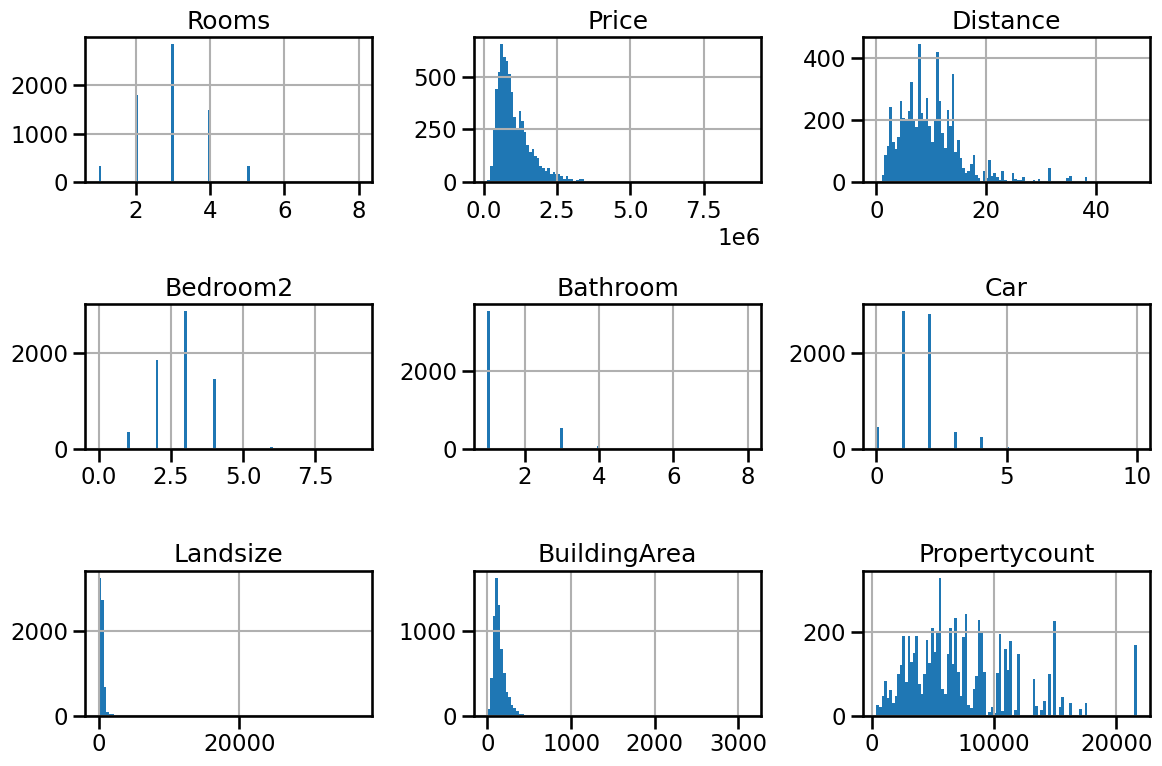

In [18]:
cols_plot = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount'] # Variables que se graficarán

melb_df2[cols_plot].hist(bins=100, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [19]:
from scipy import stats

cols_outliers = ['Landsize', 'BuildingArea', 'Propertycount'] # Variables a las que se le eliminarán outliers

for i in cols_outliers:
  melb_df2 = melb_df2[numpy.abs(stats.zscore(melb_df2[i])) < 3]

Se decidió eliminar outliers sólo de las columnas 'Landsize', 'BuildingArea' y 'Propertycount'. Las restantes variables poseen valores altos en, por ejemplo, número de habitaciones, baños, pero que pueden ser valores provenientes de propiedades inmobiliarias realmente grandes.

- No se si esto que hice es correcto, para revisar!

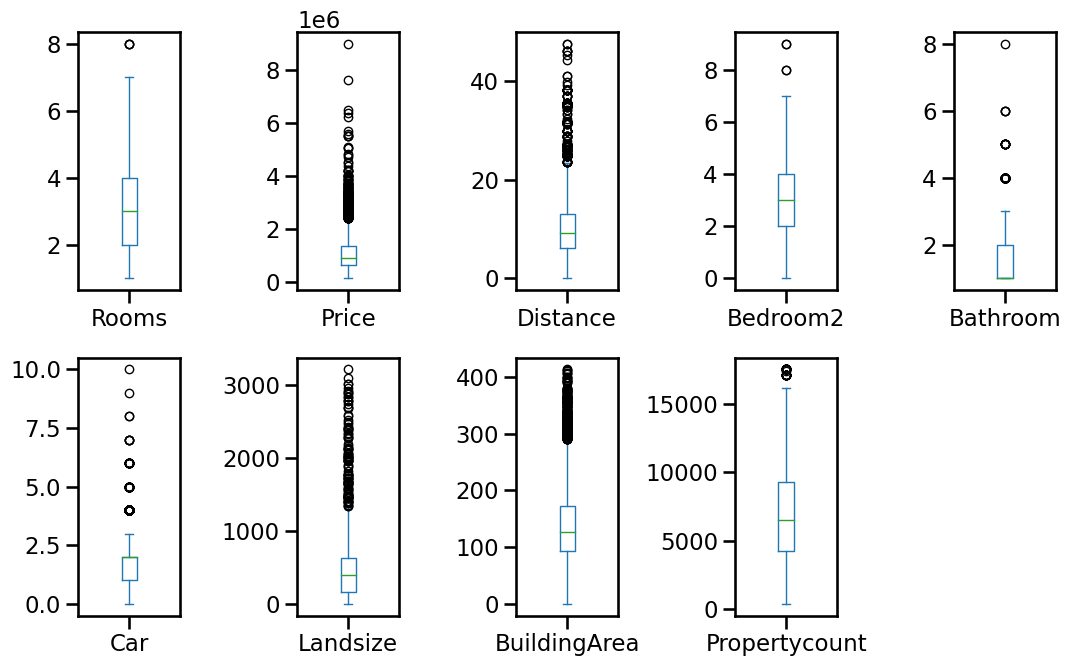

In [20]:
melb_df2[cols_plot].plot(kind="box", subplots=True, figsize=(11,7), layout = (2,5))
plt.tight_layout()
plt.show()

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.

In [21]:
airbnb_df2 = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    dtype='unicode')

Este dataframe posee numerosas columnas, por espacio no las definiremos. Seleccionamos las columnas que ofrecen informacion adicional al dataframe Melbourne. Seleccionamos las columnas 'zipcode', 'property_type', 'price', 'weekly_price' y 'monthly_price'. La variable 'property_type' puede añadir infromacion extra a la columna 'Type' del dataset Melbourne.

In [22]:
airbnb_df2.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

In [23]:
interesting_cols_airbnb = ['zipcode', 'property_type', 'price', 'weekly_price', 'monthly_price']

  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

In [24]:
airbnb_df3 = airbnb_df2.copy()
airbnb_df3 = airbnb_df3[interesting_cols_airbnb]

airbnb_df3['zipcode'] = pd.to_numeric(airbnb_df3.zipcode, errors='coerce')
airbnb_df3['zipcode'] = airbnb_df3.zipcode.fillna(0).astype('int')

min_occurrences = 150 # Toamos sólo los zipcodes que posean más entradas que este valor

valid_values = airbnb_df3['zipcode'].value_counts()
valid_values = valid_values[valid_values >= min_occurrences].index

filtered_airbnb = airbnb_df3[airbnb_df3['zipcode'].isin(valid_values)]

In [25]:
filtered_airbnb['zipcode'].value_counts()

3000    3367
3006    1268
3182    1135
3141     881
3004     728
3121     628
3008     616
3053     538
3181     460
3056     446
3065     387
3051     338
3184     335
3183     326
3068     308
3205     300
3066     297
3070     284
3003     267
3030     258
3067     258
3207     257
3128     214
3011     198
3002     197
3150     189
3031     188
3777     187
3057     185
3122     184
3032     176
3163     156
3168     152
Name: zipcode, dtype: int64

In [26]:
airbnb_price_by_zipcode = filtered_airbnb.groupby('zipcode').agg({'price': ['mean', 'count']}).reset_index()

airbnb_price_by_zipcode.columns = [' '.join(col).strip() for col in airbnb_price_by_zipcode.columns.values]

airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count'})

airbnb_price_by_zipcode[:5]

,zipcode,airbnb_price_mean,airbnb_record_count
0,3000,inf,3367
1,3002,inf,197
2,3003,inf,267
3,3004,inf,728
4,3006,inf,1268


In [29]:
merged_sales_df = melb_df2.merge(airbnb_price_by_zipcode, how='left', left_on='Postcode', right_on='zipcode')
merged_sales_df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count
0,Abbotsford,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,3067.0,inf,258.0
1,Abbotsford,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,3067.0,inf,258.0
2,Abbotsford,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,3067.0,inf,258.0
3,Abbotsford,3,h,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,3067.0,inf,258.0
4,Abbotsford,2,h,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,3067.0,inf,258.0


  3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Una de las variables que se podrían haber utilizado para combinar ambos dataset es la dirección (adress) de los diferentes inmuebles. Para ello debemos asegurarnos que en ambos dataset el formato de la dirección es exactamente el mismo, de forma que la misma propiedad en uno y otro dataset puedan ser combinados.

Otro par de variables que se podrían haber utilizado son las coordenadas geográficas de los inmuebles, es decir, latitud y longitud. Para ello debemos asegurarnos que estas variables en ambos dataset se midieron con la misma precisión, por ejemplo -38.114 es distinto que -38.1141

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [30]:
merged_sales_df.to_csv('merged_sales.csv')